# 데이터 시각화 및 탐색적 데이터 분석(EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## 데이터 불러오기

In [2]:
# Data=pd.read_excel(r"C:\Users\SAMSUNG\Desktop\koweps_2022\컬렴명_전처리_가구용.xlsx")
# data=pd.DataFrame(Data)

In [3]:
data.columns=data.loc[0]
data.drop(index=[0,1],inplace=True)
data.index=range(len(data))

NameError: name 'data' is not defined

### Sample Data 는 아래와 같다

In [ ]:
sample=data[['가구원수','광열수도비']]

In [ ]:
# 30개의 표본 추출
test=sample.loc[:30]
test=test.astype('int')

## 공분산과 상관계수
$COV(X_1,X_2)$ = $\sum (X_i-\bar X_i)(Y_i-\bar Y_i)\over n-1$
- 자유도 : n-1

### 직접 구하기

In [ ]:
cov=pd.DataFrame({"가구원수":test["가구원수"]-test["가구원수"].mean(),
                    "광열수도비":test["광열수도비"]-test["광열수도비"].mean()})

In [ ]:
cov["cov_step1"]=cov["가구원수"]*cov["광열수도비"]

In [ ]:
cov["cov_step1"].sum()/(len(cov)-1)

4.1430107526881725

### 모듈로 확인해보자

In [ ]:
import numpy as np

In [ ]:
np.cov(test["가구원수"],test["광열수도비"])

array([[ 1.76129032,  4.14301075],
       [ 4.14301075, 27.32258065]])

+ 여기서 잠깐 확인할 것.

In [ ]:
test["가구원수"].var(),test["광열수도비"].var()

(1.7612903225806449, 27.322580645161292)

### 상관계수 : 공분산의 수치에 상대성을 더하기 위한 것
    - 1. Pearson : 그들의 편차의 곱으로 나눈것

#### 직접 구하기

In [ ]:
pearson=(cov["cov_step1"].sum()/(len(cov)-1))/(cov["가구원수"].std()*cov["광열수도비"].std())

In [ ]:
pearson

0.5972274046913278

#### 모듈로 구헤보자

In [ ]:
import scipy as sp

In [ ]:
sp.stats.pearsonr(test["가구원수"],test["광열수도비"])

PearsonRResult(statistic=0.597227404691328, pvalue=0.000389529221470018)

* 참고로 알고가자       
데이터 프레임에서 바로 알수 있다.. 

In [ ]:
test.cov()

,가구원수,광열수도비
0,,
가구원수,1.761290,4.143011
광열수도비,4.143011,27.322581


In [ ]:
test.corr(method="pearson")

,가구원수,광열수도비
0,,
가구원수,1.000000,0.597227
광열수도비,0.597227,1.000000


##  변수 구간화(Binning)

### Binning의 방법
    - 1. 동일폭
    - 2. 동일 빈도
### Binning의 유효성을 검정
    -1. WOE(Weight of Evidence)
    -2. IV(Information Value)

#### 수식

$WoE$=$ln({distribution(goods)\over distribution(bads)})$

$IV$=$\sum (distriburtion(goods)-distribution(bads)) *WoE$

### 직접해보자

In [ ]:
D=pd.read_excel('https://data.hossam.kr/E05/titanic.xlsx')
data=pd.DataFrame(D)

In [ ]:
test=data.filter(["Age"])

#### Step1. 임의로 나누기

In [ ]:
test["bin1"]=pd.cut(data["Age"],bins=[0,10,20,30,40,50,60,70,80],
       labels=['유아',"10대","20대",'30대','40대','50대','60대','70대'])

In [ ]:
test["bin1"].value_counts().to_frame().style.background_gradient(cmap="Blues")

,count
bin1,
20대,230
30대,155
10대,115
40대,86
유아,64
50대,42
60대,17
70대,5


#### Step2. 관측치의 갯수가 비슷하기 나누기

In [ ]:
test["bin2"]=pd.qcut(data["Age"],q=8,labels=list(map(lambda x: chr(x+97),range(8))))

In [ ]:
test["bin2"].value_counts().to_frame().style.background_gradient(cmap='Blues')

,count
bin2,
a,100
c,98
f,91
h,89
g,88
d,85
e,84
b,79


#### Step3. 시각화해서 비교해보기

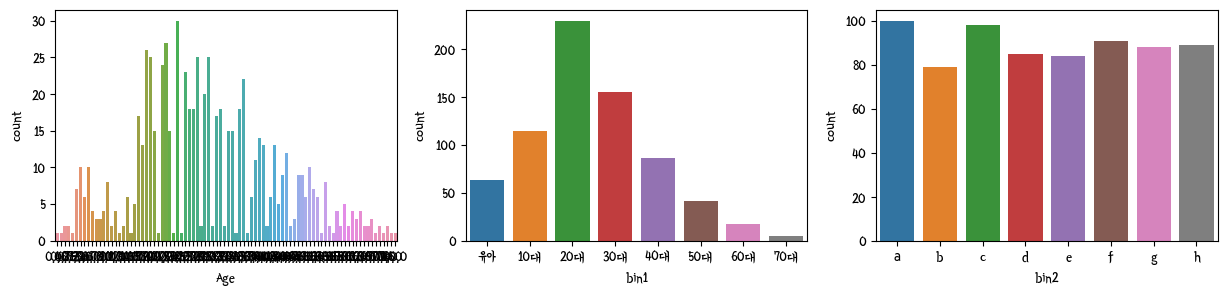

In [ ]:
plt.rcParams["figure.figsize"]=(15,3)
plt.rcParams["font.family"]="BM YEONSUNG"
f,x=plt.subplots(1,3)
for i in range(len(x)):
    sb.countplot(data=test,x=test.columns[i],ax=x[i])
plt.show()
plt.close()

### WoE를 이용한 구간 지정
<b>종속변수에 대한 독립변수가 최적의 예측력을 가질수 있게 구간화를 한다.</b>
* 종속변수의 가변수 처리가 필요함
* 모델이 말을 안들으니 다시 알아볼것.


In [ ]:
test2=data[["Survived","Fare"]]
test2=test2.dropna()

# 데이터 표준화와 정규화

|구분|설명|수식|
|--|--|--|
|표준화(Z-score)|각 관측치의 값이 전체 평균으로어느정도 떨어져있는지 나타낼때|$z $= $x-평균 \over 표준편차$|
|정규화(min_max scale)|데이터의 범위를 0~1사이로 변환할떄|$x $= $x-x_min \over x_max - x_min$|

## 데이터 불러오기

In [2]:
Data=pd.read_excel(r"C:\Users\SAMSUNG\Desktop\koweps_2022\혼또끝.xlsx")
data=pd.DataFrame(Data)
data=data[['식료품비-가정식비','식료품비-외식비',]]

### Z score

In [3]:
import sklearn.preprocessing as skpre
scale_df=pd.DataFrame(data["식료품비-가정식비"])

In [4]:
std_scaler=skpre.StandardScaler() # 객체
scale_df["Z-score"]=std_scaler.fit_transform(data[["식료품비-가정식비"]])

In [5]:
scale_df["Z-score"]=skpre.scale(X=data)

### Min-Max scaler

In [6]:
scale_df["minmax-score"]=skpre.minmax_scale(data[["식료품비-가정식비"]])

### Robust scale

In [7]:
scale_df["Robust-score"]=skpre.robust_scale(data[["식료품비-가정식비"]])

## 직접해보자

### Z-score

In [8]:
mean=scale_df[["식료품비-가정식비"]].mean().squeeze()
std=scale_df[["식료품비-가정식비"]].std().squeeze()

In [9]:
scale_df["Z-score(real)"]=scale_df[["식료품비-가정식비"]].apply(lambda x: (x-mean)/std)

### MinMax-scale 

In [10]:
min=scale_df[["식료품비-가정식비"]].min().squeeze()
max=scale_df[["식료품비-가정식비"]].max().squeeze()

In [11]:
scale_df["minmax-score(real)"]=scale_df[["식료품비-가정식비"]].apply(lambda x: (x-min)/(max-min))

In [12]:
scale_df

,식료품비-가정식비,Z-score,minmax-score,Robust-score,Z-score(real),minmax-score(real)
0,50.0,-0.351910,0.151515,-0.142857,-0.351902,0.151515
1,40.0,-0.712750,0.121212,-0.428571,-0.712733,0.121212
2,40.0,-0.712750,0.121212,-0.428571,-0.712733,0.121212
3,80.0,0.730607,0.242424,0.714286,0.730590,0.242424
4,80.0,0.730607,0.242424,0.714286,0.730590,0.242424
...,...,...,...,...,...,...
21448,100.0,1.452285,0.303030,1.285714,1.452251,0.303030
21449,100.0,1.452285,0.303030,1.285714,1.452251,0.303030
21450,100.0,1.452285,0.303030,1.285714,1.452251,0.303030
21451,53.0,-0.243659,0.160606,-0.057143,-0.243653,0.160606


### Robust scale

In [13]:
median=scale_df[["식료품비-가정식비"]].median().squeeze()
q3=scale_df[["식료품비-가정식비"]].quantile(0.75)
q1=scale_df[["식료품비-가정식비"]].quantile(0.25)
iqr=(q3-q1).squeeze()

In [14]:
scale_df["Robust-score(real)"]=scale_df[["식료품비-가정식비"]].apply(lambda x: (x-median)/(iqr))

### 확인하기

In [15]:
scale_df.head(5)

,식료품비-가정식비,Z-score,minmax-score,Robust-score,Z-score(real),minmax-score(real),Robust-score(real)
0,50.0,-0.351910,0.151515,-0.142857,-0.351902,0.151515,-0.142857
1,40.0,-0.712750,0.121212,-0.428571,-0.712733,0.121212,-0.428571
2,40.0,-0.712750,0.121212,-0.428571,-0.712733,0.121212,-0.428571
3,80.0,0.730607,0.242424,0.714286,0.730590,0.242424,0.714286
4,80.0,0.730607,0.242424,0.714286,0.730590,0.242424,0.714286


#### 그래프로 확인하기

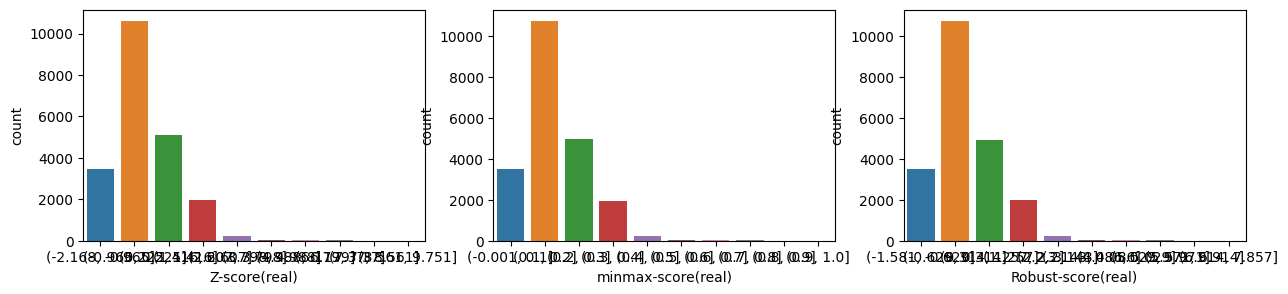

In [59]:
plt.rcParams["figure.figsize"]=(15,3)
_,a=plt.subplots(1,3)
cols=[x for x in scale_df.columns if x.find("real")!=-1]
for i in range(len(cols)):
    sb.countplot(pd.cut(scale_df[cols[i]],bins=10).to_frame(),x=cols[i],ax=a[i])

## 파생변수(Derived Variable)
> 기존변수를 활용하기 때문에 다중공산성 문제가 발생할 수 있음

## 슬라이싱 윈도우 데이터
데이터를 겹쳐 나눔으로써 전체 데이터의 양을 증가시키는 원리를 차용한 것

## 클래스 불균형을 해결하기 위한 Under Sampling, Over Sampling

### Under Sampling
#### 비중이 작은 클래스의 관측치 수와 동일해지도록 비중이 큰 클래스의 관측치를 줄이는 과정

* 1. Random Under Sampling : 무작위 제거를 통해 비중이 큰 클래스 관측치를 제거
* 2. EasyEnsemble : 비중이 큰 클래스를 비중이 작은 클래스 만큼 쪼갠 후 (예를 들어 N(비중이 큰 클래스의 관측수)/m(비중이 작은 클래스의 관측수)개) 그만큼의
                    클래스로 학습 후 종합시켜 최종 학습모델을 이용
* 3. Condensed Nearest Neighbor(CNN) : K-Nearest Neighbor 모델을 차용(뒤에서 자세히 다룰 예정)

### Over Sampling
#### 비중이 큰 클래스의 관측치 수와 동일해지도록 비중이 작은 클래스의 관측치를 증가시키는 과정

* 1. Random Over Sampling : 무작위 복사를 통해 비중이 작은 클래스 관측치 증가(과적합의 문제가 발생하기 쉬움)
* 2. Synthetic Minority Over-Sampling Technique(SMOTE) : 아래 이미지 참조

<img sec='C:/Users/SAMSUNG/Desktop/Private_Space/데이터분석가가알아야할/이미지/SMOTE.png' width="100%" height=50% title='SMOTE'></img> 

### 각각 해보자

In [3]:
test=Data[["성별","삶의 사다리 점수"]]

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"]="BM YEONSUNG"

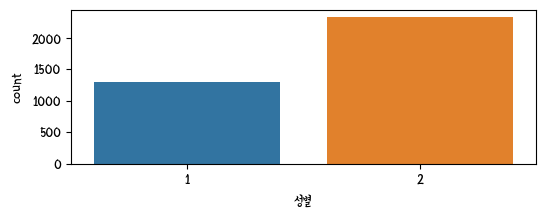

In [12]:
plt.figure(figsize=(6,2))
sns.countplot(x=test["성별"])
plt.show()
plt.close()